<div class="alert alert-block alert-success">
    <h1 align="center">Sentiment Analysis</h1>
    <h3 align="center">On</h3>
    <h3 align="center">... Review.csv dataset ...</h3>
    <h3 align="center">"Task Three"</h3>
    <h4 align="center"><a href="http://www.github.com/omid-asadi">Omid Asadi</a></h5>
    <h4 align="center">student number: 970149637</h4>
</div>

##  Tasks for this week contains:
 <b>A. Data Cleaning <br>
 B. Data Tokenizing<br>
 C. Calculating TF-IDF<br>
 D. Applying SVM Approach<br>
 E. Precision & Confusion Matrix</b><br>
 <img src=" https://miro.medium.com/max/1300/0*m355u3-pHvd5DsLA.png" width="358" height="auto" width="100%" align="left"/> </p>


In [1]:
import pandas as pd
import numpy as np
import re
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
data     = pd.read_csv('review.csv', encoding = "latin-1", low_memory=False)
data.rename(columns={'review':'Sentence','sentiment':'Class'},inplace=True)

data['index'] = data.index

data

,Sentence,Class,index
0,"lancelot du lac ( lancelot du lac ) ( france ,...",1,0
1,director : brian de palma writer : david koepp...,1,1
2,"six days , seven nights reviewed by jamie peck...",1,2
3,"cast : mel gibson ( jerry fletcher ) , julia r...",1,3
4,"all great things come to an end , and the dot-...",1,4
5,filmcritic . com presents a review from staff ...,1,5
6,"moulin rouge ( 2001 ) nicole kidman , ewan mcg...",1,6
7,"i seem to be in a minority of one , but chris ...",1,7
8,starring antonio banderas and sir anthony hopk...,1,8
9,"in _daylight_ , sylvester stallone breaks no n...",1,9


 <b>                   <br>

###  Check the Relativity Status Between Positives & Negatives:


 1    694
-1    692
Name: Class, dtype: int64


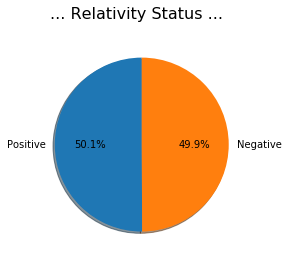

In [3]:
relativity = data['Class'].value_counts(dropna=False)
print(relativity)
print("==========================")

labels = 'Positive', 'Negative'
fig1, ax1 = plt.subplots()
fig1.suptitle('... Relativity Status ...', fontsize=16)
ax1.pie(relativity, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

<div class="alert alert-block alert-success">
    <h1 align="center"> Preprocessing Part </h1>
    <h3 align="center">.......... Data Cleaning .........</h3>

</div>

In [4]:
#Text Preprocessing
columns = ['index','Class', 'Sentence']
df_ = pd.DataFrame(columns=columns)

#lower string
data['Sentence'] = data['Sentence'].str.lower()

#remove email adress
data['Sentence'] = data['Sentence'].replace('[a-zA-Z0-9-_.]+@[a-zA-Z0-9-_.]+', '', regex=True)

#remove IP address
data['Sentence'] = data['Sentence'].replace('((25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)(\.|$)){4}', '', regex=True)

#remove punctaitions and special chracters
data['Sentence'] = data['Sentence'].str.replace('[^\w\s]','')

#remove numbers
data['Sentence'] = data['Sentence'].replace('\d', '', regex=True)

In [5]:
#remove stop words
for index, row in data.iterrows():
    word_tokens = word_tokenize(row['Sentence'])
    filtered_sentence = [w for w in word_tokens if not w in stopwords.words('english')]
    df_ = df_.append({"index": row['index'], "Class":  row['Class'],"Sentence": " ".join(filtered_sentence[0:])}, ignore_index=True)
    print(index,"of",data["index"].shape)
data = df_

0 of (1386,)
1 of (1386,)
2 of (1386,)
3 of (1386,)
4 of (1386,)
5 of (1386,)
6 of (1386,)
7 of (1386,)
8 of (1386,)
9 of (1386,)
10 of (1386,)
11 of (1386,)
12 of (1386,)
13 of (1386,)
14 of (1386,)
15 of (1386,)
16 of (1386,)
17 of (1386,)
18 of (1386,)
19 of (1386,)
20 of (1386,)
21 of (1386,)
22 of (1386,)
23 of (1386,)
24 of (1386,)
25 of (1386,)
26 of (1386,)
27 of (1386,)
28 of (1386,)
29 of (1386,)
30 of (1386,)
31 of (1386,)
32 of (1386,)
33 of (1386,)
34 of (1386,)
35 of (1386,)
36 of (1386,)
37 of (1386,)
38 of (1386,)
39 of (1386,)
40 of (1386,)
41 of (1386,)
42 of (1386,)
43 of (1386,)
44 of (1386,)
45 of (1386,)
46 of (1386,)
47 of (1386,)
48 of (1386,)
49 of (1386,)
50 of (1386,)
51 of (1386,)
52 of (1386,)
53 of (1386,)
54 of (1386,)
55 of (1386,)
56 of (1386,)
57 of (1386,)
58 of (1386,)
59 of (1386,)
60 of (1386,)
61 of (1386,)
62 of (1386,)
63 of (1386,)
64 of (1386,)
65 of (1386,)
66 of (1386,)
67 of (1386,)
68 of (1386,)
69 of (1386,)
70 of (1386,)
71 of (1386,)
72

554 of (1386,)
555 of (1386,)
556 of (1386,)
557 of (1386,)
558 of (1386,)
559 of (1386,)
560 of (1386,)
561 of (1386,)
562 of (1386,)
563 of (1386,)
564 of (1386,)
565 of (1386,)
566 of (1386,)
567 of (1386,)
568 of (1386,)
569 of (1386,)
570 of (1386,)
571 of (1386,)
572 of (1386,)
573 of (1386,)
574 of (1386,)
575 of (1386,)
576 of (1386,)
577 of (1386,)
578 of (1386,)
579 of (1386,)
580 of (1386,)
581 of (1386,)
582 of (1386,)
583 of (1386,)
584 of (1386,)
585 of (1386,)
586 of (1386,)
587 of (1386,)
588 of (1386,)
589 of (1386,)
590 of (1386,)
591 of (1386,)
592 of (1386,)
593 of (1386,)
594 of (1386,)
595 of (1386,)
596 of (1386,)
597 of (1386,)
598 of (1386,)
599 of (1386,)
600 of (1386,)
601 of (1386,)
602 of (1386,)
603 of (1386,)
604 of (1386,)
605 of (1386,)
606 of (1386,)
607 of (1386,)
608 of (1386,)
609 of (1386,)
610 of (1386,)
611 of (1386,)
612 of (1386,)
613 of (1386,)
614 of (1386,)
615 of (1386,)
616 of (1386,)
617 of (1386,)
618 of (1386,)
619 of (1386,)
620 of (13

1094 of (1386,)
1095 of (1386,)
1096 of (1386,)
1097 of (1386,)
1098 of (1386,)
1099 of (1386,)
1100 of (1386,)
1101 of (1386,)
1102 of (1386,)
1103 of (1386,)
1104 of (1386,)
1105 of (1386,)
1106 of (1386,)
1107 of (1386,)
1108 of (1386,)
1109 of (1386,)
1110 of (1386,)
1111 of (1386,)
1112 of (1386,)
1113 of (1386,)
1114 of (1386,)
1115 of (1386,)
1116 of (1386,)
1117 of (1386,)
1118 of (1386,)
1119 of (1386,)
1120 of (1386,)
1121 of (1386,)
1122 of (1386,)
1123 of (1386,)
1124 of (1386,)
1125 of (1386,)
1126 of (1386,)
1127 of (1386,)
1128 of (1386,)
1129 of (1386,)
1130 of (1386,)
1131 of (1386,)
1132 of (1386,)
1133 of (1386,)
1134 of (1386,)
1135 of (1386,)
1136 of (1386,)
1137 of (1386,)
1138 of (1386,)
1139 of (1386,)
1140 of (1386,)
1141 of (1386,)
1142 of (1386,)
1143 of (1386,)
1144 of (1386,)
1145 of (1386,)
1146 of (1386,)
1147 of (1386,)
1148 of (1386,)
1149 of (1386,)
1150 of (1386,)
1151 of (1386,)
1152 of (1386,)
1153 of (1386,)
1154 of (1386,)
1155 of (1386,)
1156 of 


<br>      </br>
###  Spliting the data into four parts ...


In [6]:
X_train, X_test, y_train, y_test = train_test_split(data['Sentence'].values.astype('U'),data['Class'].values.astype('int32'), test_size=0.10, random_state=0)
classes  = data['Class'].unique()

<div class="alert alert-block alert-success">
    <h3 align="center"> ... TF-IDF and applying SVM model ... </h3>


</div>

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC, SVC

vectorizer = TfidfVectorizer(analyzer='word',ngram_range=(1,2), max_features=50000,max_df=0.5,use_idf=True, norm='l2') 
counts = vectorizer.fit_transform(X_train)
vocab = vectorizer.vocabulary_
classifier = LinearSVC()
targets = y_train
classifier = classifier.fit(counts, targets)
example_counts = vectorizer.transform(X_test)
predictions = classifier.predict(example_counts)

<div class="alert alert-block alert-success">
    <h2 align="center"> ... Evaluating our model ... </h2>

</div>

In [8]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

#Model Evaluation
acc = accuracy_score(y_test, predictions, normalize=True)
hit = precision_score(y_test, predictions, average=None,labels=classes)
capture = recall_score(y_test, predictions, average=None,labels=classes)
print('Model Accuracy:%.2f'%acc)
print(classification_report(y_test, predictions))

Model Accuracy:0.83
              precision    recall  f1-score   support

          -1       0.80      0.78      0.79        58
           1       0.84      0.86      0.85        81

    accuracy                           0.83       139
   macro avg       0.82      0.82      0.82       139
weighted avg       0.83      0.83      0.83       139



In [9]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    else:
        print()

    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.figure(figsize=(150,100))

,Category,Index
0,1,1
1,-1,2


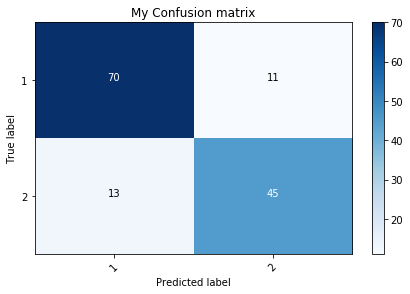

<Figure size 10800x7200 with 0 Axes>

In [10]:
cnf_matrix = confusion_matrix(y_test, predictions,classes)
np.set_printoptions(precision=2)
class_names = range(1,classes.size+1)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='My Confusion matrix')
classInfo = pd.DataFrame(data=[])

for i in range(0,classes.size):
    classInfo = classInfo.append([[classes[i],i+1]],ignore_index=True)
classInfo.columns=['Category','Index']
classInfo